# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score, make_scorer
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Файлы открыты и изучены, три файла с данными: общий файл, файл для обучения модели,тестовый файл. Данные цифровые, кроме одного с информацией о дате,данная строка объектная.

In [9]:
#проверка расчета эффективности 
full['mae'] = (full['rougher.output.concentrate_au']*(full['rougher.input.feed_au'] - full['rougher.output.tail_au']))/(full['rougher.input.feed_au']*(full['rougher.output.concentrate_au'] - full['rougher.output.tail_au']))*100
full['rougher.output.recovery']
check = full[['rougher.output.recovery','mae']]
check['difference'] = check['rougher.output.recovery'] - check['mae']
print(check.sort_values(by = 'difference', ascending = False))

       rougher.output.recovery         mae    difference
18576                90.643794   90.643794  7.105427e-14
20817                93.532080   93.532080  7.105427e-14
5037                 34.915704   34.915704  7.105427e-14
8114                 90.080026   90.080026  5.684342e-14
6555                 84.582464   84.582464  5.684342e-14
...                        ...         ...           ...
22553                      NaN  112.957805           NaN
22554                      NaN  100.442153           NaN
22555                      NaN   -0.482567           NaN
22556                      NaN   -0.584325           NaN
22557                      NaN   -1.498298           NaN

[22716 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
train = train.fillna(method='ffill')
print(train.isna().sum().sum())
print(train.duplicated().sum())

0
0


In [11]:
test = test.fillna(method='ffill')
print(test.isna().sum().sum())
print(test.duplicated().sum())

0
0


Проведена предобработка данных:
1.проверка расчета эффективности обогащения,

2.наличие пропусков,дубликатов и изучения типа данных.

Проверка расчета показала, что все данные расчитаны правильно, максимальная погрешность составляет 7.105427e-14 единицы, а так же, что в расчетах есть пропуски, пропуски были удалены, так как составляли небольшую часть данных. 

Общее количество пропусков по таблице варьируется от 30 до 36 тыс.шт.,данные пропуски заполнены для дальнешего обучения моделей.

В тестовой выборке отсуттвуют данные о параметрах продукта,включително целеные признаки.

# 2. Анализ данных

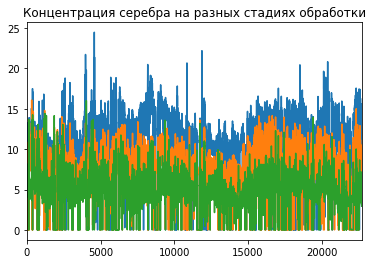

In [12]:
#изменение концентрации серебра
full['rougher.output.concentrate_ag'].plot(title = 'Концентрация серебра на разных стадиях обработки')
full['primary_cleaner.output.concentrate_ag'].plot()
full['final.output.concentrate_ag'].plot()

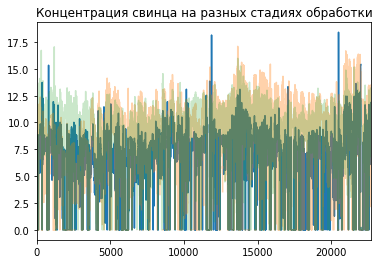

In [13]:
#изменение концентрации свинца
full['rougher.output.concentrate_pb'].plot(title = 'Концентрация свинца на разных стадиях обработки')
full['primary_cleaner.output.concentrate_pb'].plot(alpha = 0.35)
full['final.output.concentrate_pb'].plot(alpha = 0.25)

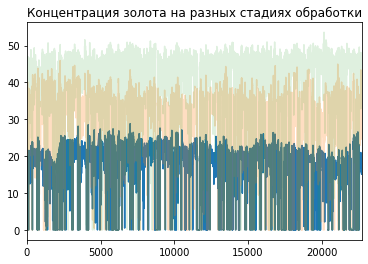

In [14]:
#изменение концентрации золота
full['rougher.output.concentrate_au'].plot(title = 'Концентрация золота на разных стадиях обработки')
full['primary_cleaner.output.concentrate_au'].plot(alpha = 0.25)
full['final.output.concentrate_au'].plot(alpha = 0.15)

Концентрания металов на разных стадиях обработки сильно разнится:
    концентрация серебра с каждой стадией уменьщается, подобно воронке, 
    концентрация свинца примерно одинаково на каждой из стадий, 
однако после первичной обработки она выросла, а после вторичной снизилась, став чуть больше, чем после флотации. 
    концентрация золота с каждой стадией обработки увеличивается.

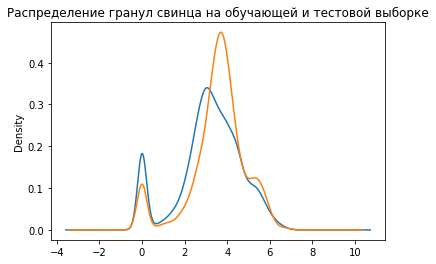

In [15]:
#распределение гранул свинца
train['rougher.input.feed_pb'].plot.kde(title = 'Распределение гранул свинца на обучающей и тестовой выборке')
test['rougher.input.feed_pb'].plot.kde()

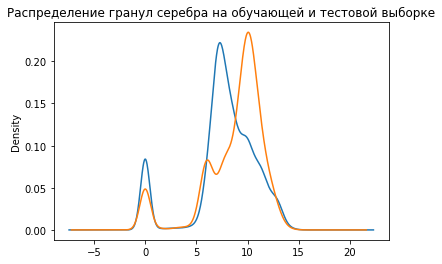

In [16]:
#распределение гранул серебра
train['rougher.input.feed_ag'].plot.kde(title = 'Распределение гранул серебра на обучающей и тестовой выборке')
test['rougher.input.feed_ag'].plot.kde()

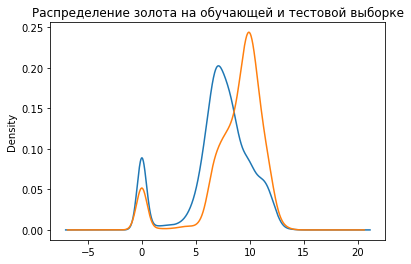

In [17]:
#распределение золота
train['rougher.input.feed_au'].plot.kde(title = 'Распределение золота на обучающей и тестовой выборке')
test['rougher.input.feed_au'].plot.kde()

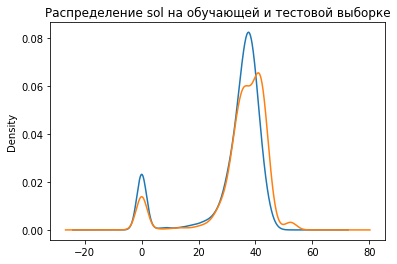

In [18]:
#распределение sol
train['rougher.input.feed_sol'].plot.kde(title = 'Распределение sol на обучающей и тестовой выборке')
test['rougher.input.feed_sol'].plot.kde()

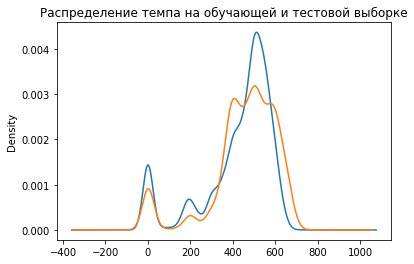

In [19]:
#распределение темпа
train['rougher.input.feed_rate'].plot.kde(title = 'Распределение темпа на обучающей и тестовой выборке')
test['rougher.input.feed_rate'].plot.kde()

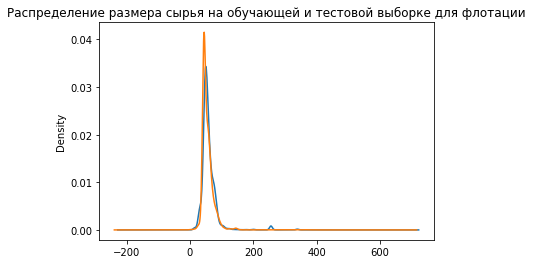

In [20]:
#распределение золота
train['rougher.input.feed_size'].plot.kde(title = 'Распределение размера сырья на обучающей и тестовой выборке для флотации')
test['rougher.input.feed_size'].plot.kde()

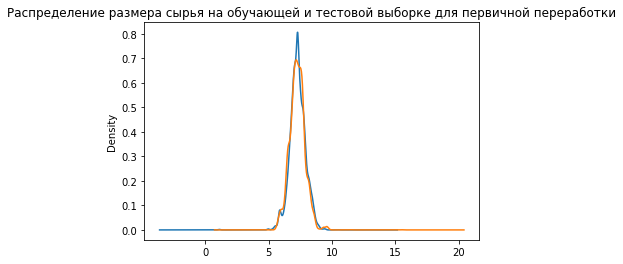

In [21]:
#распределение размера сырья
train['primary_cleaner.input.feed_size'].plot.kde(title = 'Распределение размера сырья на обучающей и тестовой выборке для первичной переработки')
test['primary_cleaner.input.feed_size'].plot.kde()

Распределение металлов, их размера и темппа обработки на обучающей и тестовой выборке близки по показателям, однако присутствуют выбросы и отклонения в распределении.

In [22]:
#суммарная концентрация всех веществ на разных стадиях
train['rougher_concetrates_sum'] = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_au']+ train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol']
train['primary_cleaner_concetrates_sum'] = train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_au']+ train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol']
train['final_concetrates_sum'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_au']+ train['final.output.concentrate_pb'] + train['final.output.concentrate_sol']

In [23]:
print('Концентрация после флотации',train['rougher_concetrates_sum'].describe())
print('Концентрация после первичной обработки',train['primary_cleaner_concetrates_sum'].describe())
print('Финальная концентрация',train['final_concetrates_sum'].describe())

Концентрация после флотации count    16860.000000
mean        59.961791
std         24.042979
min          0.000000
25%         61.468859
50%         68.332115
75%         73.020072
max         90.964431
Name: rougher_concetrates_sum, dtype: float64
Концентрация после первичной обработки count    16860.000000
mean        53.882975
std         20.565840
min          0.000000
25%         55.034350
50%         61.079904
75%         64.861965
max         76.918076
Name: primary_cleaner_concetrates_sum, dtype: float64
Финальная концентрация count    16860.000000
mean        61.267542
std         21.690164
min          0.000000
25%         66.531283
50%         68.803475
75%         70.695552
max         80.210644
Name: final_concetrates_sum, dtype: float64


Суммарная концентрация всех веществ на разных стадиях ообработки немного разнится, в среднем на 1-6 %, сильных выбрасов на разных стадиях нет, об этом говорит примерно равные средние и медианные значения концентраций. 

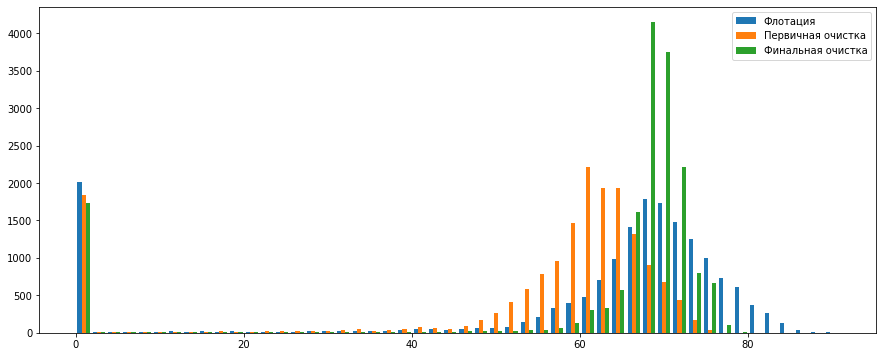

In [24]:
plt.figure(figsize=(15,6))
plt.hist([train['rougher_concetrates_sum'],train['primary_cleaner_concetrates_sum'],train['final_concetrates_sum']], bins = 50, 
          label=['Флотация','Первичная очистка', 'Финальная очистка']);
plt.legend();

# 3. Модель

In [25]:
#деление данных на признаки и целевые признаки
target_train = train[['rougher.output.recovery','final.output.recovery']]
features_train = train[test.columns][:len(target_train)]
features_train = features_train.drop(['date'],axis = 1)

test = test.merge(full[['rougher.output.recovery', 'final.output.recovery','date']], on='date', how='left')
target_test = test[['rougher.output.recovery','final.output.recovery']]
features_test = test.drop(['rougher.output.recovery','final.output.recovery','date'],axis = 1)

In [26]:
#проверка размеров выборки и заполнение пропусков
print(len(features_train))
print(len(target_train))
target_train = target_train.fillna(method='ffill')
print(target_train.isna().sum())
print(np.isinf(features_train).sum().sum())
print(np.isinf(target_train).sum().sum())
print(target_train.isnull().sum().sum())

16860
16860
rougher.output.recovery    0
final.output.recovery      0
dtype: int64
0
0
0


In [27]:
#проверка размеров выборки и заполнение пропусков
print(len(test))
print(len(target_test))
print(target_test.isna().sum())
target_test = target_test.fillna(method='ffill')
print(np.isinf(features_test).sum().sum())
print(np.isinf(target_test).sum().sum())
print(target_test.isnull().sum().sum())

5856
5856
rougher.output.recovery    546
final.output.recovery      442
dtype: int64
0
0
0


In [28]:
#Итоговая метрика
def smape(target,prediction):
    SMAPE = np.sum(2 * np.abs(prediction - target) / (np.abs(target) + np.abs(prediction)))/len(prediction)*100
    return SMAPE

In [29]:
scorer = make_scorer(score_func=smape,greater_is_better = True)

In [30]:
#выбор значения гиперпараметров для модели № 1
n_estimators_array = [1, 3, 5, 7, 10, 15]
max_depth_array = [1, 3, 5, 7, 10, 15,20,25]
model1 = RandomForestRegressor(random_state = 42)
grid = GridSearchCV(model1, param_grid=({'n_estimators': n_estimators_array},{'max_depth': max_depth_array}))
grid.fit(features_train,target_train)
best_max_depth = grid.best_estimator_.max_depth
best_n_estimators = grid.best_estimator_.n_estimators
print(grid.best_score_, best_n_estimators,best_max_depth)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with '

-0.12357694291397815 10 3


In [31]:
model1 = RandomForestRegressor(random_state = 42,max_depth =3 ,n_estimators =10 )
model1.fit(features_train,target_train)
prediction1 = model1.predict(features_test)
smape(target_test,prediction1)

rougher.output.recovery    11.291015
final.output.recovery      11.926221
dtype: float64

In [32]:
#кросс-валидация модели №1 по эффективности обогащения чернового концентрата
cross_val_score(model1,features_train,target_train['rougher.output.recovery'],cv=5,scoring = scorer).mean()

16.678624353957982

In [33]:
#кросс-валидация модели №1 по эффективности обогащения финального концентрата
cross_val_score(model1,features_train,target_train['final.output.recovery'],cv=5,scoring = scorer).mean()

14.137002800142804

In [34]:
#выбор значения гиперпараметра max_depth для модели № 2
max_depth_array = [1, 3, 5, 7, 10, 15,20,25]
model2 = DecisionTreeRegressor()
grid = GridSearchCV(model2, param_grid={'max_depth': max_depth_array})
grid.fit(features_train,target_train)

best_max_depth = grid.best_estimator_.max_depth
print(grid.best_score_, best_max_depth)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with '

-0.14228007753404137 1


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [35]:
model2 = DecisionTreeRegressor(random_state = 42,max_depth = 1)
model2.fit(features_train,target_train)
prediction2 = model2.predict(features_test)
smape(target_test,prediction2)

rougher.output.recovery    13.229426
final.output.recovery      13.338370
dtype: float64

In [36]:
#кросс-валидация модели №2 по эффективности обогащения чернового концентрата
cross_val_score(model2,features_train,target_train['rougher.output.recovery'],cv=5,scoring = scorer).mean()

18.469025600218934

In [37]:
#кросс-валидация модели №2 по эффективности обогащения финального концентрата
cross_val_score(model2,features_train,target_train['final.output.recovery'],cv=5,scoring = scorer).mean()

14.916941435402284

In [38]:
model3 = LinearRegression()
model3.fit(features_train,target_train)
prediction3 = model3.predict(features_test)
smape(target_test,prediction3)

rougher.output.recovery    11.974661
final.output.recovery      12.424173
dtype: float64

In [39]:
#кросс-валидация модели №3 по эффективности обогащения чернового концентрата
cross_val_score(model3,features_train,target_train['rougher.output.recovery'],cv=5,scoring = scorer).mean()

20.70559844442473

In [40]:
#кросс-валидация модели №3 по эффективности обогащения финального концентрата
cross_val_score(model3,features_train,target_train['final.output.recovery'],cv=5,scoring = scorer).mean()

15.722898213881559

In [41]:
sMAPE_final = 0.25*16.678624353957982 + 0.75*14.137002800142804
round(sMAPE_final,2)

14.77

Выборки разделены на обучающие и целевые признаки, модели обучены.
Применена проверка на кросс-валидации того, чтобы оценить ожидаемый уровень соответствия модели данным, независимым от тех данных, на которых модель тренировалась. На модели № 1 кросс-валидация показала наилучший результат,а именно эффективность обогащения чернового концентрата, равную 16.68 едииницы, и эффективность обогащения финального концентрата,равную 14.14 единицы.
Итоговая метрика эффективности обогащения концентрата равна 14.77 единиц.

In [42]:
#проверка на адекватность 
dummy_clf = DummyClassifier()
dummy_clf.fit(features_train,target_train)
predictions = dummy_clf.predict(features_test)
print(smape(target_test,predictions))

rougher.output.recovery    21.896969
final.output.recovery      20.795436
dtype: float64


In [43]:

constant_model = target_test[['rougher.output.recovery','final.output.recovery']]
constant_model['rougher.output.recovery'] = target_train['rougher.output.recovery'].mean()
constant_model['final.output.recovery'] = target_train['final.output.recovery'].mean()
smape(target_test,constant_model.to_numpy())

rougher.output.recovery    13.064807
final.output.recovery      13.219328
dtype: float64

In [44]:
#кросс-валидация константной модели по эффективности обогащения финального концентрата
cross_val_score(dummy_clf,features_train,target_train['rougher.output.recovery'],cv=5,scoring = scorer).mean()

26.37260803526969

In [45]:
#кросс-валидация константной модели по эффективности обогащения финального концентрата
cross_val_score(dummy_clf,features_train,target_train['final.output.recovery'],cv=5,scoring = scorer).mean()

22.65891685601381

Для проверки модели на адекватность был использован классификатор в качестве простой базовой линии для сравнения
с реальными классификаторами.
Проверка показала, что модель № 1 дает наилучший результат по используемой метрике, чем используемым для сравнения классификатор, 
тем самым доказывая адекватность модели.

# Общий вывод

Файлы открыты и изучены, три файла с данными: общий файл, файл для обучения модели,тестовый файл. Данные цифровые, кроме одного с информацией о дате,данная строка объектная.

Проведена предобработка данных:
1.проверка расчета эффективности обогащения,

2.наличие пропусков,дубликатов и изучения типа данных.

Проверка расчета показала, что все данные расчитаны правильно, максимальная погрешность составляет 7.105427e-14 единицы, а так же, что в расчетах есть пропуски, пропуски были удалены, так как составляли небольшую часть данных. 

Общее количество пропусков по таблице варьируется от 30 до 36 тыс.шт.,данные пропуски заполнены для дальнешего обучения моделей.

В тестовой выборке отсуттвуют данные о параметрах продукта,включително целеные признаки.

Концентрания металов на разных стадиях обработки сильно разнится: концентрация серебра с каждой стадией уменьщается, подобно воронке, концентрация свинца примерно одинаково на каждой из стадий, однако после первичной обработки она выросла, а после вторичной снизилась, став чуть больше, чем после флотации. концентрация золота с каждой стадией обработки увеличивается.

Распределение металлов, их размера и темппа обработки на обучающей и тестовой выборке близки по показателям, однако присутствуют выбросы и отклонения в распределении.

Суммарная концентрация всех веществ на разных стадиях ообработки немного разнится, в среднем на 1-6 %, сильных выбрасов на разных стадиях нет, об этом говорит примерно равные средние и медианные значения концентраций.

Выборки разделены на обучающие и целевые признаки, модели обучены. Применена проверка на кросс-валидации того, чтобы оценить ожидаемый уровень соответствия модели данным, независимым от тех данных, на которых модель тренировалась. На модели № 1 кросс-валидация показала наилучший результат,а именно эффективность обогащения чернового концентрата, равную 16.68 едииницы, и эффективность обогащения финального концентрата,равную 14.14 единницы.
Итоговая метрика эффективности обогащения концентрата равна 14.77 единиц.

Для проверки модели на адекватность был использован классификатор в качестве простой базовой линии для сравнения с реальными классификаторами. Проверка показала, что модель № 1 дает наилучший результат по используемой метрике, чем используемым для сравнения классификатор, тем самым доказывая адекватность модели.